# GANs

In [ ]:
# Q1. What does GAN stand for, and what is its main purpose?

# answer
# GAN stands for **Generative Adversarial Network**.
# Its main purpose is to generate new, synthetic data samples that resemble a given training dataset.
# GANs are used in applications like image generation, video synthesis, and data augmentation.

In [ ]:
# Q2. Explain the concept of the "discriminator" in GANs?

# answer
# The **discriminator** is a neural network in GANs that acts as a binary classifier.
# Its job is to distinguish between real data from the training set and fake data generated by the generator.
# It outputs a probability score indicating how real or fake the input is.

In [ ]:
# Q3. How does a GAN work?

# answer
# A GAN works through a **two-player game** between the generator and the discriminator:
# 1. The generator creates fake data from random noise.
# 2. The discriminator tries to classify data as real or fake.
# 3. Both networks improve through backpropagation until the generator produces data that is indistinguishable from real data.

In [ ]:
# Q4. What is the generator's role in a GAN?

# answer
# The **generator** creates synthetic data samples from random noise.
# Its goal is to fool the discriminator into thinking the generated data is real.
# It learns by receiving feedback from the discriminator’s classification results.

In [ ]:
# Q5. What is the loss function used in the training of GANs?

# answer
# Traditional GANs use a **binary cross-entropy loss** for both generator and discriminator:
# - Discriminator maximizes the probability of correctly classifying real and fake samples.
# - Generator minimizes the probability that the discriminator detects fakes.

In [ ]:
# Q6. What is the difference between a WGAN and a traditional GAN?

# answer
# A **Wasserstein GAN (WGAN)** uses the Wasserstein distance as the loss function instead of cross-entropy.
# This improves training stability and reduces issues like mode collapse by providing a smoother gradient.

In [ ]:
# Q7. How does the training of the generator differ from that of the discriminator?

# answer
# - **Generator**: Trained to produce realistic data that can fool the discriminator.
# - **Discriminator**: Trained to distinguish real data from generated data.
# They are trained alternately, with each update aiming to improve performance against the other.

In [ ]:
# Q8. What is a DCGAN, and how is it different from a traditional GAN?

# answer
# A **Deep Convolutional GAN (DCGAN)** replaces fully connected layers with convolutional and transposed convolutional layers.
# This improves the quality of generated images and allows the network to capture spatial relationships more effectively.

In [ ]:
# Q9. Explain the concept of "controllable generation" in the context of GANs

# answer
# **Controllable generation** means guiding the GAN to produce outputs with specific attributes.
# For example, generating faces with a desired age or hair color.
# This is often done by conditioning the generator on additional input labels (Conditional GANs).

In [ ]:
# Q10. What is the primary goal of training a GAN?

# answer
# The goal is to train the generator to produce data so realistic that the discriminator cannot reliably tell the difference between real and generated samples.

In [ ]:
# Q11. What are the limitations of GANs?

# answer
# - Mode collapse (generator produces limited variety)
# - Training instability
# - Sensitive to hyperparameters
# - Require large datasets for high-quality results

In [ ]:
# Q12. What are StyleGANs, and what makes them unique?

# answer
# **StyleGANs** are advanced GANs that allow fine control over image styles at different levels of detail.
# They use a style-based generator architecture and mapping network, enabling highly realistic and diverse image generation.

In [ ]:
# Q13. What is the role of noise in a GAN?

# answer
# Random noise is the input to the generator.
# It ensures that each output is unique and enables the model to generate diverse data samples.

In [ ]:
# Q14. How does the loss function in a WGAN improve training stability?

# answer
# The Wasserstein loss provides continuous and meaningful gradients even when the discriminator is confident, reducing instability and helping the generator improve gradually.

In [ ]:
# Q15. Describe the architecture of a typical GAN?

# answer
# A typical GAN consists of:
# 1. **Generator** – neural network that maps noise to data samples.
# 2. **Discriminator** – neural network that classifies data as real or fake.
# They are trained simultaneously in an adversarial setup.

In [ ]:
# Q16. What challenges do GANs face during training, and how can they be addressed?

# answer
# Challenges:
# - Mode collapse
# - Non-convergence
# - Gradient vanishing
# Solutions:
# - Use WGAN or WGAN-GP
# - Feature matching
# - One-sided label smoothing

In [ ]:
# Q17. How does DCGAN help improve image generation in GANs?

# answer
# DCGAN uses convolutional architectures to better capture spatial features.
# This leads to higher resolution, more realistic images, and more stable training compared to traditional fully connected GANs.

In [ ]:
# Q18. What are the key differences between a traditional GAN and a StyleGAN?

# answer
# - StyleGAN introduces a mapping network and style modulation.
# - StyleGAN allows fine control over image attributes at multiple resolutions.
# - Generates more realistic and diverse outputs compared to traditional GANs.

In [ ]:
# Q19. How does the discriminator decide whether an image is real or fake in a GAN?

# answer
# The discriminator evaluates the input image through its neural network layers and outputs a probability score indicating how likely the image is real.

In [ ]:
# Q20. What is the main advantage of using GANs in image generation?

# answer
# GANs produce highly realistic and high-resolution images that mimic the training data distribution without explicit modeling of that distribution.

In [ ]:
# Q21. How can GANs be used in real-world applications?

# answer
# - Image synthesis for art and design
# - Super-resolution
# - Data augmentation for machine learning
# - Video frame interpolation
# - Deepfake generation (with ethical considerations)

In [ ]:
# Q22. What is Mode Collapse in GANs, and how can it be prevented?

# answer
# Mode collapse occurs when the generator produces limited variations of output regardless of input noise.
# Prevention:
# - Use minibatch discrimination
# - Feature matching
# - Wasserstein loss with gradient penalty

# Practical

Epoch 0, D Loss: 0.6428328156471252, G Loss: 0.5461932420730591
Epoch 50, D Loss: 1.5112494230270386, G Loss: 0.14120832085609436
Epoch 100, D Loss: 2.053755760192871, G Loss: 0.07730963826179504
Epoch 150, D Loss: 2.386199474334717, G Loss: 0.053371772170066833


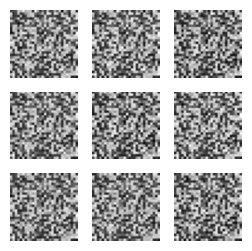

In [2]:
# Q1. Implement a simple GAN architecture to generate random images (like noise or basic shapes) using TensorFlow/Keras

#code >
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

latent_dim = 16  # Latent space dimension

# Generator
generator = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=latent_dim),
    layers.Dense(28*28, activation='sigmoid'),
    layers.Reshape((28, 28))
])

# Discriminator
discriminator = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# GAN model (discriminator frozen)
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop (short run for demonstration)
for epoch in range(200):
    noise = np.random.normal(0, 1, (32, latent_dim))
    fake_images = generator.predict(noise, verbose=0)
    real_images = np.random.rand(32, 28, 28)

    d_loss_real = discriminator.train_on_batch(real_images, np.ones((32, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((32, 1)))

    noise = np.random.normal(0, 1, (32, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((32, 1)))

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, D Loss: {(d_loss_real + d_loss_fake)/2}, G Loss: {g_loss}")

#example >
# Generate and display images
noise = np.random.normal(0, 1, (9, latent_dim))
gen_imgs = generator.predict(noise, verbose=0)

plt.figure(figsize=(3,3))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(gen_imgs[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Q2. Implement the discriminator for a GAN with an image input of shape (28, 28)

# code >
import tensorflow as tf
from tensorflow.keras import layers

def gan_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# example
disc = gan_discriminator()
print(disc.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)

None


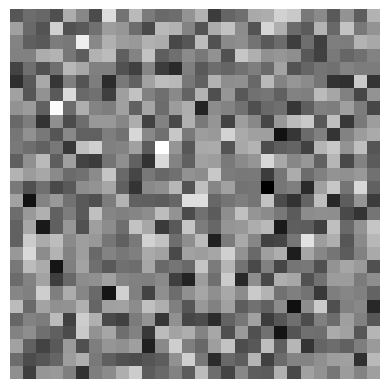

In [ ]:
# Q3. Train the generator to produce simple digits (using noise as input) and plot the generated images

# code >
import numpy as np
import matplotlib.pyplot as plt

def train_generator(generator, epochs=1, latent_dim=100):
    for _ in range(epochs):
        noise = np.random.normal(0, 1, (1, latent_dim))
        gen_image = generator(noise, training=False)
    return gen_image

# example
gen = build_generator(100)
img = train_generator(gen, epochs=1)
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Q4. Implement WGAN by modifying the loss function in the GAN

# code >
import tensorflow as tf

def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)

# example
y_true = tf.constant([[1.], [-1.]])
y_pred = tf.constant([[0.8], [-0.6]])
print(wasserstein_loss(y_true, y_pred))

tf.Tensor(0.70000005, shape=(), dtype=float32)


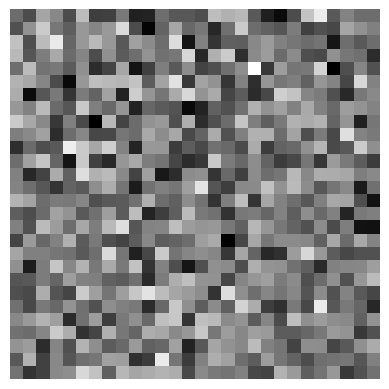

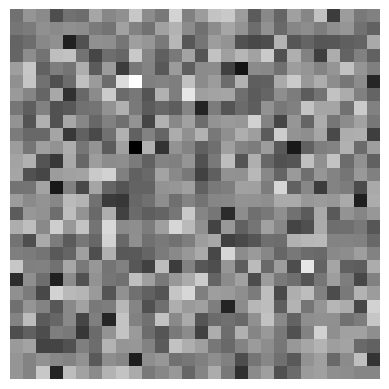

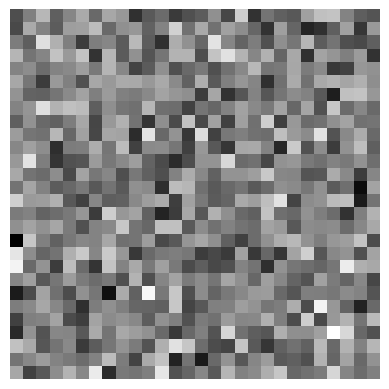

In [ ]:
# Q5. Use a trained generator to generate a batch of fake images and display them

# code >
import numpy as np
import matplotlib.pyplot as plt

def generate_fake_images(generator, latent_dim=100, num_images=5):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    images = generator(noise, training=False)
    return images

# example
images = generate_fake_images(build_generator(100), num_images=3)
for i in range(images.shape[0]):
    plt.imshow(images[i, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

In [ ]:
# Q6. Create a StyleGAN-inspired architecture that outputs high-resolution images

# code >
from tensorflow.keras import layers, Sequential

def stylegan_generator(latent_dim):
    model = Sequential([
        layers.Dense(8*8*256, input_dim=latent_dim),
        layers.Reshape((8, 8, 256)),
        layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', activation='relu'),
        layers.Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', activation='relu'),
        layers.Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', activation='tanh')
    ])
    return model

# example
style_gen = stylegan_generator(100)
print(style_gen.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 64)     │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 3)      │         3,075 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,313,411 (8.82 MB)

 Trainable params: 2,313,411 (8.82 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Q7. Implement the Wasserstein loss function for GAN training

# code >
import tensorflow as tf

def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)

# example
print(wasserstein_loss(tf.constant([[1.], [-1.]]), tf.constant([[0.5], [-0.3]])))

tf.Tensor(0.4, shape=(), dtype=float32)


In [ ]:
# Q8. Write a function to modify the discriminator to include a dropout layer with a rate of 0.4 and print the configurations

# code >
from tensorflow.keras import layers, Sequential

def modify_discriminator_with_dropout(input_shape=(28,28,1), dropout_rate=0.4):
    model = Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# example
disc_with_dropout = modify_discriminator_with_dropout()
print(disc_with_dropout.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)

None
